## Анализ стоимости акций

In [26]:
!pip install -q yfinance
!pip install pandas_datareader

### Импорт библиотек, подготовка датасета

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_styly("whitegrid")
#plt.style.use("fivethirtyeiaght")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

from datetime import datetime

tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

end = datetime.now()

start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]

company_name = ["AAPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name

df = pd.concat(company_list, axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [28]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-28,146.979996,147.600006,145.529999,147.029999,147.029999,42711700,AMAZON
2023-11-29,147.850006,148.539993,145.970001,146.320007,146.320007,40610900,AMAZON
2023-11-30,144.759995,146.929993,144.330002,146.089996,146.089996,65814000,AMAZON
2023-12-01,146.000000,147.250000,145.550003,147.029999,147.029999,39924600,AMAZON
2023-12-04,145.250000,145.350006,142.809998,144.839996,144.839996,48294200,AMAZON
2023-12-05,143.550003,148.570007,143.130005,146.880005,146.880005,46822400,AMAZON
2023-12-06,147.580002,147.850006,144.279999,144.520004,144.520004,39679000,AMAZON
2023-12-07,146.149994,147.919998,145.339996,146.880005,146.880005,52352800,AMAZON
2023-12-08,145.479996,147.839996,145.399994,147.419998,147.419998,41858000,AMAZON


### Описательная статистика

In [29]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,163.037690,164.920219,161.323606,163.200100,162.275968,7.496852e+07
std,17.098585,16.829978,17.309843,17.066635,17.216682,2.624672e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,2.404830e+07
25%,148.877495,150.924999,147.252502,149.362503,148.320210,5.527430e+07
50%,164.644997,166.340004,162.974998,165.045006,163.725891,7.018920e+07
75%,175.832504,177.562500,174.124996,175.715004,174.758205,8.798468e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.954327e+08


In [30]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2021-12-13 to 2023-12-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          502 non-null    float64
 1   High          502 non-null    float64
 2   Low           502 non-null    float64
 3   Close         502 non-null    float64
 4   Adj Close     502 non-null    float64
 5   Volume        502 non-null    int64  
 6   company_name  502 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.4+ KB


### Данные на момент закрытия биржи

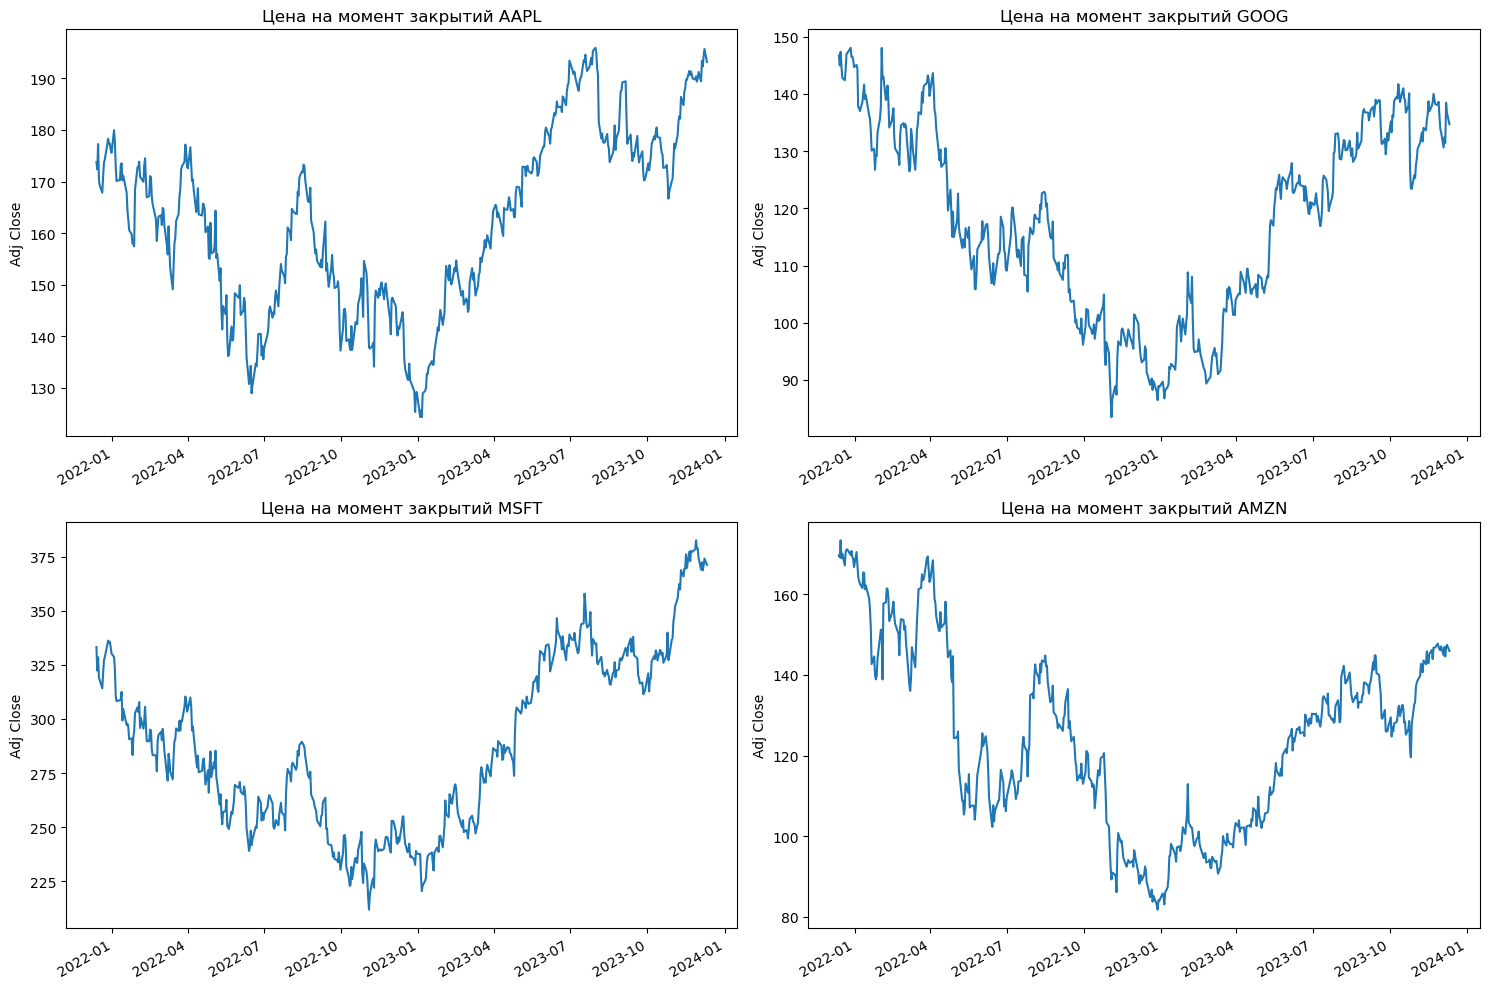

In [31]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2, i)
    company["Adj Close"].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title(f"Цена на момент закрытий {tech_list[i-1]}")

plt.tight_layout()

### Данные об объеме торгов

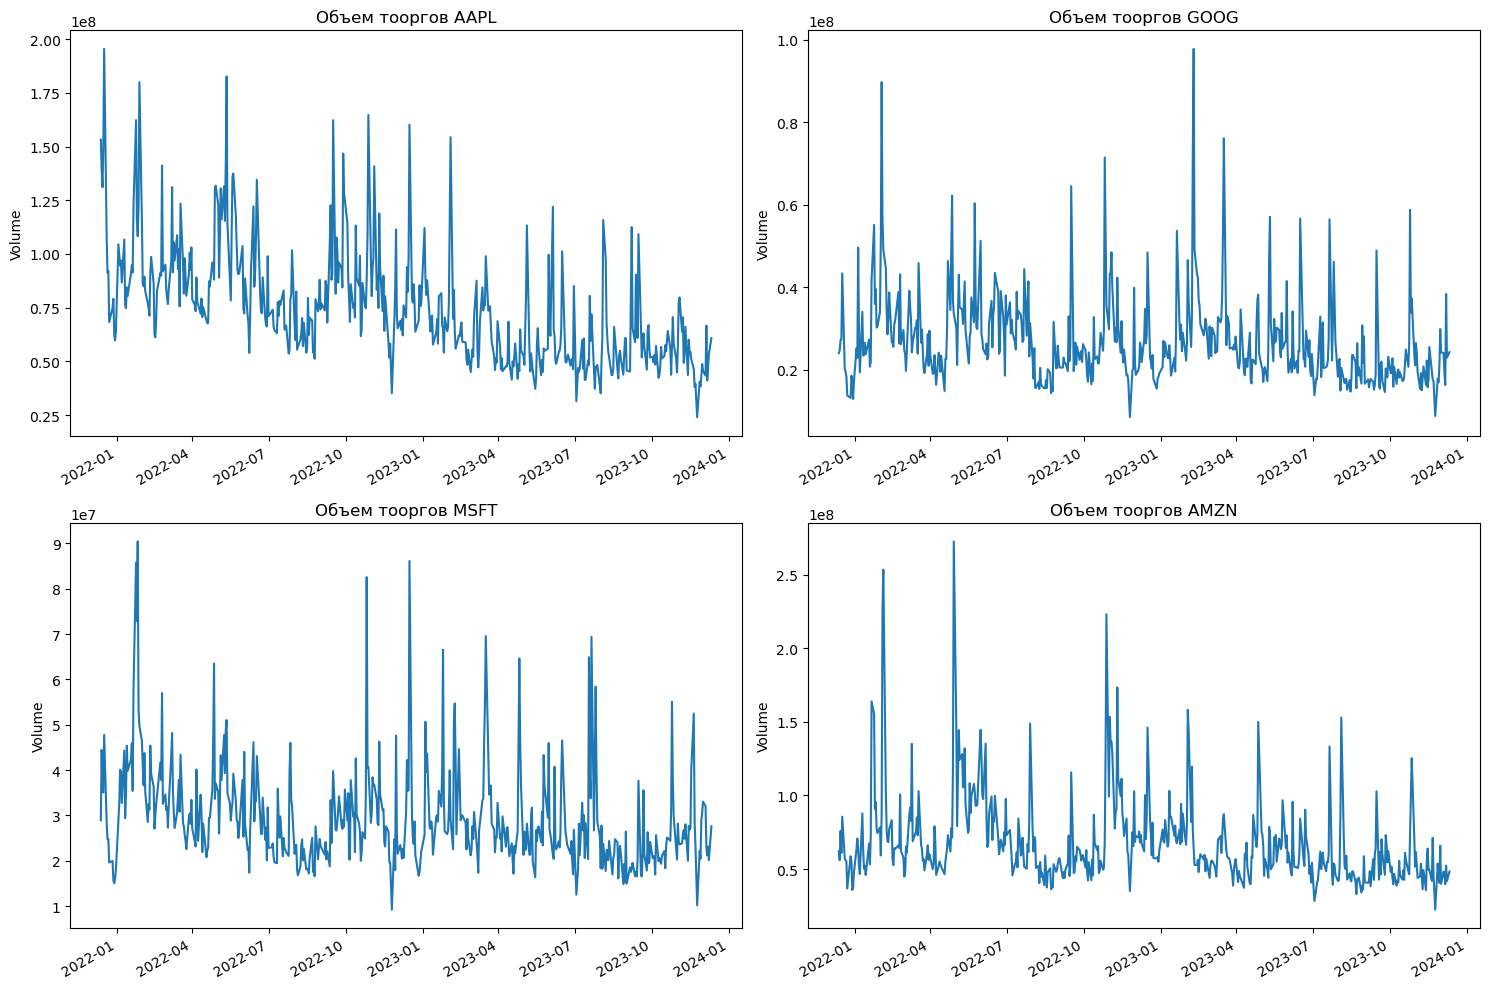

In [32]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2, i)
    company["Volume"].plot()
    plt.ylabel("Volume")
    plt.xlabel(None)
    plt.title(f"Объем тооргов {tech_list[i-1]}")

plt.tight_layout()

### Модель MA (Moving Average) скользящего среднего

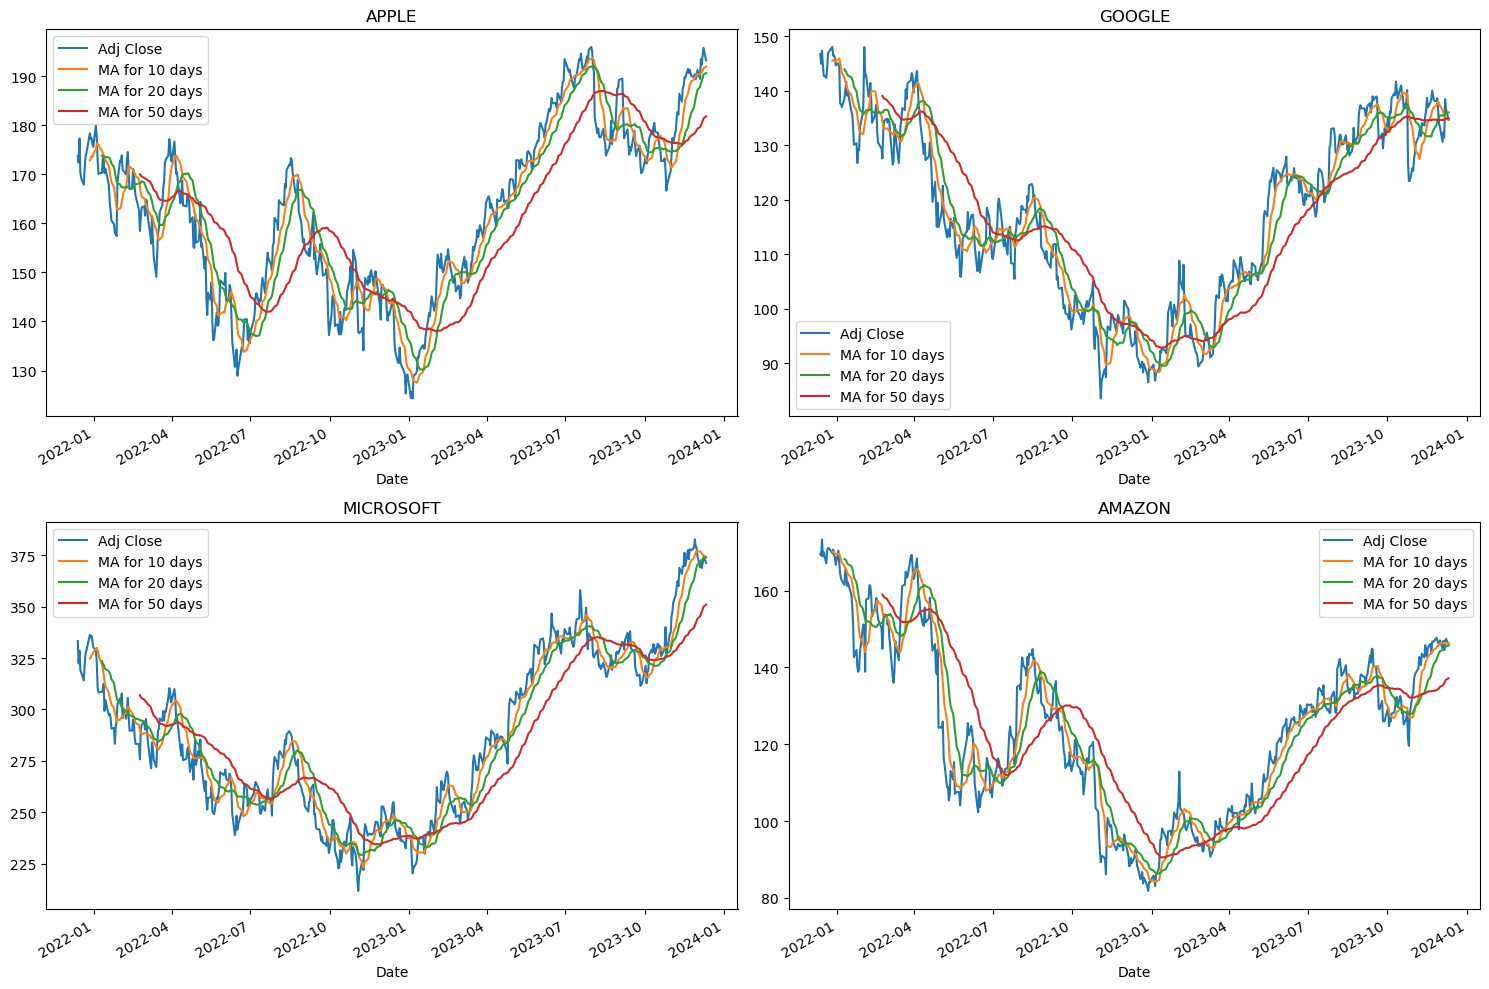

In [33]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### Дневные изменения

Text(0.5, 1.0, 'AMAZON')

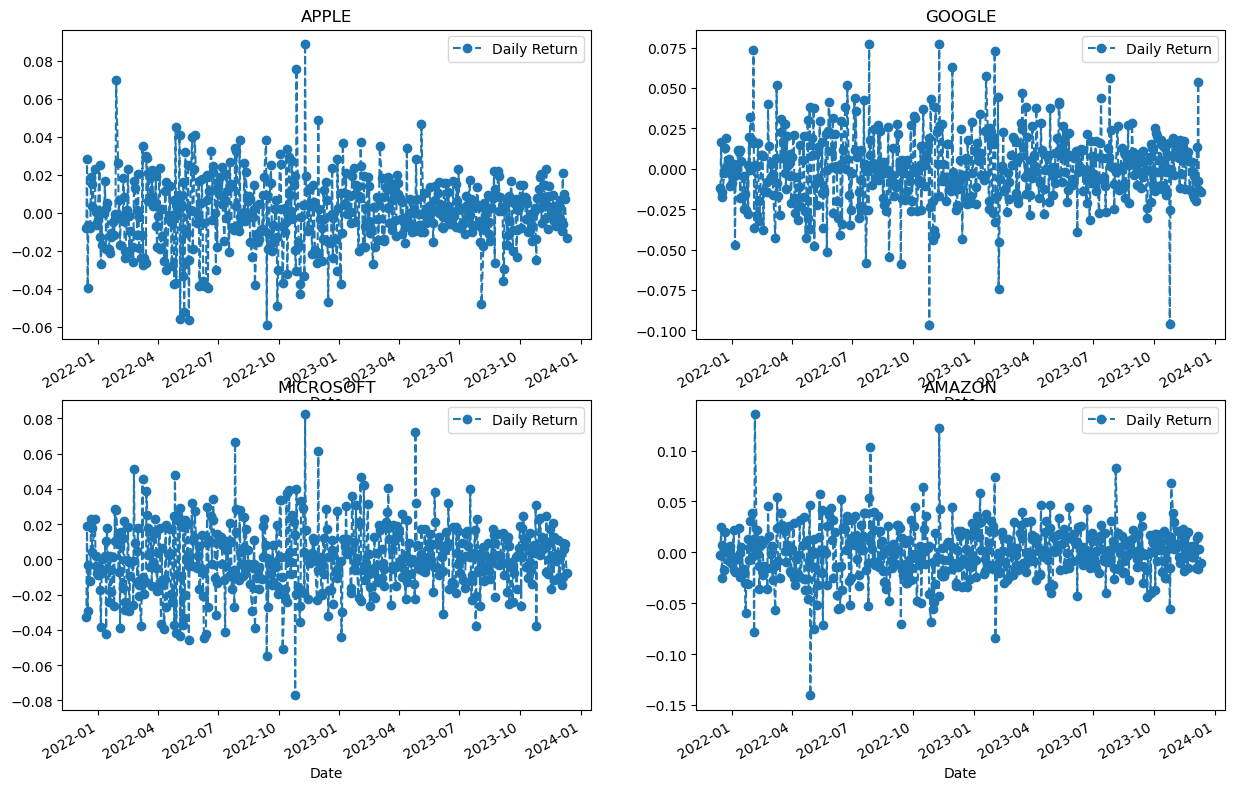

In [34]:
for company in company_list:
    company["Daily Return"] = company["Adj Close"].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL["Daily Return"].plot(ax=axes[0,0], legend=True, linestyle="--", marker="o")
axes[0,0].set_title("APPLE")

GOOG["Daily Return"].plot(ax=axes[0,1], legend=True, linestyle="--", marker="o")
axes[0,1].set_title("GOOGLE")

MSFT["Daily Return"].plot(ax=axes[1,0], legend=True, linestyle="--", marker="o")
axes[1,0].set_title("MICROSOFT")

AMZN["Daily Return"].plot(ax=axes[1,1], legend=True, linestyle="--", marker="o")
axes[1,1].set_title("AMAZON")

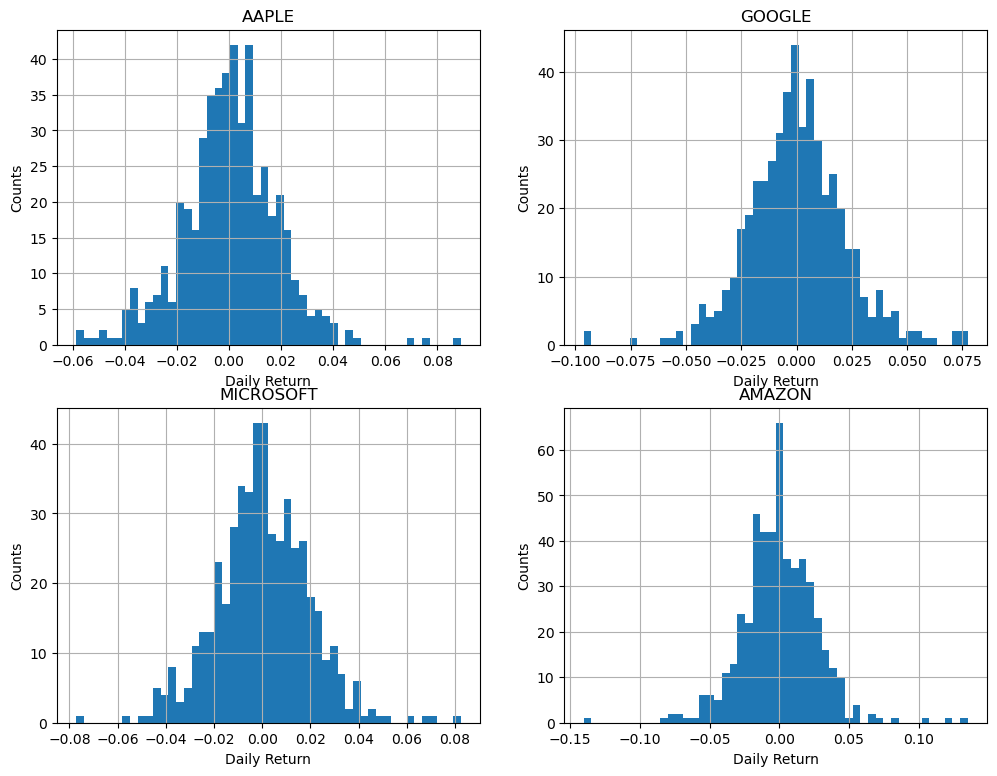

In [35]:
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company["Daily Return"].hist(bins=50)
    plt.xlabel("Daily Return")
    plt.ylabel("Counts")
    plt.title(f"{company_name[i-1]}")

fig.tight_layout()

### Корреляция стоимости акций

In [36]:
tech_list = ["AAPL"]

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

closing_df = df[df['company_name'] == "AMAZON"]["Adj Close"]
#closing_df.head()
tech_rets = closing_df.pct_change()
tech_rets.head(10)

Date
2021-12-13         NaN
2021-12-14   -0.002807
2021-12-15    0.024978
2021-12-16   -0.025641
2021-12-17    0.006789
2021-12-20   -0.017284
2021-12-21    0.019979
2021-12-22    0.003638
2021-12-23    0.000184
2021-12-27   -0.008178
Name: Adj Close, dtype: float64

In [37]:
df = pdr.get_data_yahoo("AAPL", start="2020-01-01", end=datetime.now())
df

TypeError: string indices must be integers, not 'str'